# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 8

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 1

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
260,Steffen,Manchester City,45,1.0,7,5.141046,7.0,5.141046,4.471518,33.114289,2.423512
475,Sá,Wolves,50,8.0,32,35.229904,4.0,4.403738,4.901154,42.114365,1.969412
270,de Gea,Manchester Utd,51,8.0,30,34.090867,3.8,4.261358,4.676736,39.096954,1.886961
80,Raya,Brentford,46,8.0,32,32.221979,4.0,4.027747,4.158316,43.181083,1.877947
353,Lloris,Tottenham,55,8.0,36,34.112683,4.5,4.264085,3.394245,39.615794,1.818212
143,Mendy,Chelsea,61,7.0,39,30.922482,5.6,4.417497,4.375541,41.457267,1.788592
257,Ederson,Manchester City,60,7.0,35,29.987320,5.0,4.283903,4.478347,39.112733,1.748896
146,Guaita,Crystal Palace,45,8.0,28,29.638215,3.5,3.704777,4.012348,38.480953,1.746449
294,Darlow,Newcastle Utd,45,4.0,12,14.453679,3.0,3.613420,4.032927,37.491948,1.703382


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,57,2.0,23,13.463566,11.5,6.731783,6.539454,51.588878,2.819634
253,Mendy,Manchester City,53,1.0,3,6.041046,3.0,6.041046,NaN,34.328571,2.624063
246,N.Williams,Liverpool,39,1.0,4,4.936191,4.0,4.936191,3.571000,30.126904,2.499537
237,Alexander-Arnold,Liverpool,75,6.0,41,40.433146,6.8,6.738858,5.995175,51.970994,2.460683
256,Cancelo,Manchester City,63,8.0,50,47.970366,6.2,5.996296,5.965381,47.936861,2.388981
501,Sarr,Chelsea,49,1.0,8,5.131783,8.0,5.131783,4.892521,41.950372,2.318303
91,Pinnock,Brentford,46,8.0,40,37.692979,5.0,4.711622,5.105742,43.713875,2.196805
76,Jansson,Brentford,47,8.0,40,36.834979,5.0,4.604372,4.346716,41.596666,2.123839
259,Laporte,Manchester City,55,6.0,36,29.746274,6.0,4.957712,3.750906,39.169292,2.113976


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,68,4.0,26,24.912046,6.5,6.228011,5.949329,36.817127,2.388333
233,Salah,Liverpool,128,8.0,83,67.005382,10.4,8.375673,7.996214,60.255423,2.341072
96,Mbeumo,Brentford,55,8.0,29,39.655495,3.6,4.956937,5.609579,44.782001,2.113645
482,Townsend,Everton,57,8.0,45,39.224969,5.6,4.903121,6.019461,43.323159,2.053691
419,Benrahma,West Ham,66,8.0,47,41.304969,5.9,5.163121,4.507537,45.355323,2.009742
240,Jota,Liverpool,75,7.0,32,37.089084,4.6,5.298441,6.140385,44.790140,1.934717
173,Doucouré,Everton,57,8.0,45,36.146969,5.6,4.518371,5.167861,41.371964,1.892537
230,Mané,Liverpool,119,8.0,49,51.501382,6.1,6.437673,6.613614,52.928243,1.866188
369,Bergwijn,Tottenham,59,3.0,15,13.549439,5.0,4.516480,NaN,32.199401,1.859405


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540,7.7,8.513333,NaN,48.949158,3.009918
413,Antonio,West Ham,81,7.0,50,45.504,7.1,6.500571,4.325000,65.754376,2.284068
189,Bamford,Leeds United,78,5.0,21,26.342,4.2,5.268400,5.135500,39.302949,1.886390
307,Saint-Maximin,Newcastle Utd,68,8.0,39,38.413,4.9,4.801625,5.428400,40.241872,1.841339
296,Wilson,Newcastle Utd,73,4.0,24,19.900,6.0,4.975000,4.700000,39.754026,1.841330
78,Toney,Brentford,64,8.0,33,36.762,4.1,4.595250,5.388400,46.826818,1.816432
205,Vardy,Leicester City,106,8.0,56,47.071,7.0,5.883875,6.500000,60.451847,1.807218
263,Jesus,Manchester City,86,7.0,41,36.884,5.9,5.269143,4.317750,41.554221,1.796763
583,Hwang,Wolves,56,5.0,26,20.800,5.2,4.160000,3.400000,39.431672,1.757921


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540000,7.7,8.513333,48.949158,3.009918
233,Salah,Liverpool,128,8.0,83,67.005382,10.4,8.375673,60.255423,2.341072
237,Alexander-Arnold,Liverpool,75,6.0,41,40.433146,6.8,6.738858,51.970994,2.460683
135,Chilwell,Chelsea,57,2.0,23,13.463566,11.5,6.731783,51.588878,2.819634
413,Antonio,West Ham,81,7.0,50,45.504000,7.1,6.500571,65.754376,2.284068
230,Mané,Liverpool,119,8.0,49,51.501382,6.1,6.437673,52.928243,1.866188
268,Torres,Manchester City,68,4.0,26,24.912046,6.5,6.228011,36.817127,2.388333
253,Mendy,Manchester City,53,1.0,3,6.041046,3.0,6.041046,34.328571,2.624063
256,Cancelo,Manchester City,63,8.0,50,47.970366,6.2,5.996296,47.936861,2.388981


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,7.7,8.513333,NaN,48.949158,3.009918
135,Chilwell,Chelsea,57,2.0,11.5,6.731783,6.539454,51.588878,2.819634
253,Mendy,Manchester City,53,1.0,3.0,6.041046,NaN,34.328571,2.624063
246,N.Williams,Liverpool,39,1.0,4.0,4.936191,3.571000,30.126904,2.499537
237,Alexander-Arnold,Liverpool,75,6.0,6.8,6.738858,5.995175,51.970994,2.460683
260,Steffen,Manchester City,45,1.0,7.0,5.141046,4.471518,33.114289,2.423512
256,Cancelo,Manchester City,63,8.0,6.2,5.996296,5.965381,47.936861,2.388981
268,Torres,Manchester City,68,4.0,6.5,6.228011,5.949329,36.817127,2.388333
233,Salah,Liverpool,128,8.0,10.4,8.375673,7.996214,60.255423,2.341072


In [11]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,80,3.0,23,25.540000,7.7,8.513333,8.833333,48.949158,3.009918
233,Salah,Liverpool,128,8.0,83,67.005382,10.4,8.375673,8.464448,60.255423,2.341072
237,Alexander-Arnold,Liverpool,75,6.0,41,40.433146,6.8,6.738858,6.854428,51.970994,2.460683
135,Chilwell,Chelsea,57,2.0,23,13.463566,11.5,6.731783,6.539454,51.588878,2.819634
413,Antonio,West Ham,81,7.0,50,45.504000,7.1,6.500571,6.500571,65.754376,2.284068
230,Mané,Liverpool,119,8.0,49,51.501382,6.1,6.437673,6.466448,52.928243,1.866188
268,Torres,Manchester City,68,4.0,26,24.912046,6.5,6.228011,6.325634,36.817127,2.388333
256,Cancelo,Manchester City,63,8.0,50,47.970366,6.2,5.996296,6.194466,47.936861,2.388981
359,Son,Tottenham,101,7.0,51,40.826024,7.3,5.832289,5.927009,47.056908,1.835179


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df[defenders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 9 prediction,valuePoints metric
id,,,,,,,,,,
135,Chilwell,Chelsea,57,2.0,23,13.463566,11.5,6.731783,6.089689,2.819634
237,Alexander-Arnold,Liverpool,75,6.0,41,40.433146,6.8,6.738858,5.282769,2.460683
119,Azpilicueta,Chelsea,62,8.0,42,33.467265,5.2,4.183408,5.062356,1.680097
501,Sarr,Chelsea,49,1.0,8,5.131783,8.0,5.131783,4.873804,2.318303
122,Alonso,Chelsea,59,6.0,39,28.761699,6.5,4.793616,4.830716,1.973501
256,Cancelo,Manchester City,63,8.0,50,47.970366,6.2,5.996296,4.583242,2.388981
411,Cresswell,West Ham,55,8.0,33,31.322875,4.1,3.915359,4.473966,1.669515
127,Rüdiger,Chelsea,58,7.0,36,24.622482,5.1,3.517497,4.455703,1.460561
431,Saïss,Wolves,50,8.0,26,32.958904,3.2,4.119863,4.378197,1.842459


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
230,Mané,Liverpool,119,8.0,6.1,6.437673,1.866188,5.8,1.0,6.8,0.850000
205,Vardy,Leicester City,106,8.0,7.0,5.883875,1.807218,4.8,0.7,5.5,0.687500
233,Salah,Liverpool,128,8.0,10.4,8.375673,2.341072,4.6,3.3,7.9,0.987500
413,Antonio,West Ham,81,7.0,7.1,6.500571,2.284068,4.5,2.3,6.8,0.971429
177,Calvert-Lewin,Everton,80,3.0,7.7,8.513333,3.009918,3.8,0.1,3.9,1.300000
96,Mbeumo,Brentford,55,8.0,3.6,4.956937,2.113645,3.7,0.7,4.4,0.550000
240,Jota,Liverpool,75,7.0,4.6,5.298441,1.934717,3.4,1.9,5.3,0.757143
579,Ronaldo,Manchester Utd,125,5.0,4.8,5.000000,1.414214,3.1,0.2,3.3,0.660000
529,Lukaku,Chelsea,117,7.0,4.4,5.300000,1.549469,3.1,1.9,5.0,0.714286


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week2,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,bonus,bonus_week1,bonus_week2,bonus_week3,bonus_week4,bonus_week5,bonus_week6,bonus_week7,bonus_week8,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week2,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,cleansheet_week7,cleansheet_week8,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,...,value,value form 10,value form 5,valuePoints metric,value_form,value_next10,value_season,web_name,xA,xA_points,xA_week1,xA_week2,xA_week3,xA_week4,xA_week5,xA_week6,xA_week7,xA_week8,xG,xG+xA,xG+xA per game,xGA_week1,xGA_week2,xGA_week3,xGA_week4,xGA_week5,xGA_week6,xGA_week7,xGA_week8,xG_points,xG_week1,xG_week2,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xPoints,xPoints week 1,xPoints week 2,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints_next10,yellow_cards,gameweek 18 prediction
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
413,45.504,6.500571,4,2.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,11,3.0,3.0,2.0,0.0,NaN,3.0,0.0,0.0,192,100.0,100.0,0.0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,57531,NaN,NaN,0,0,6,-6,231.2,11,3,NaN,NaN,3,4,4.2,3.7,1,...,0.80254,0.80254,0.533951,2.284068,0.5,8.117824,6.2,Antonio,2.3,6.9,0.1,0.6,0.5,0.0,NaN,0.6,0.3,0.2,4.5,6.8,0.971429,1.4,0.8,0.7,0.8,1.8,1.2,1.3,0.8,17.52,1.1,1.0,0.4,0.2,NaN,0.9,0.2,0.7,4.4,9.242,11.571,7.871,-0.2,NaN,9.4,3.7,4.4,65.754376,2,7.663702


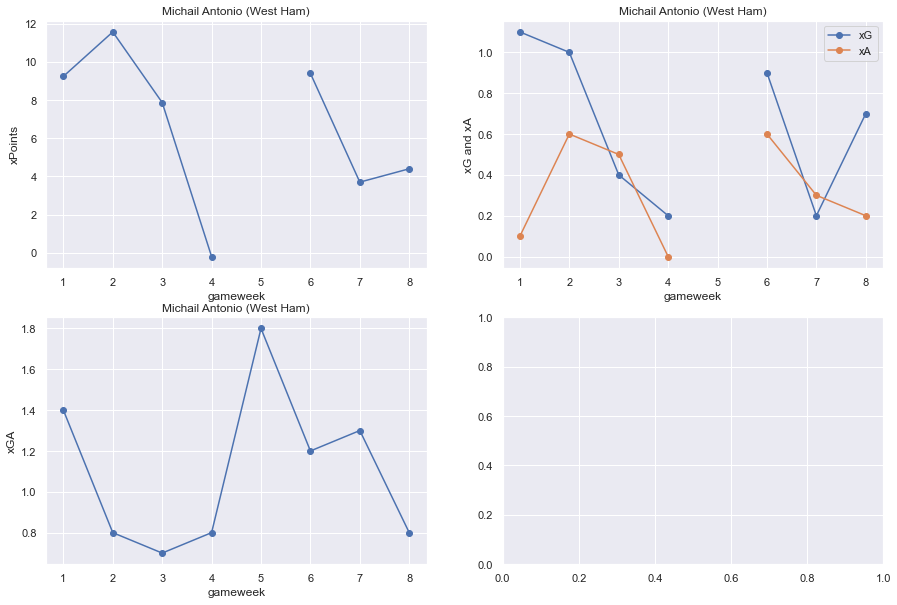

In [26]:
# find player index
name_string = 'Antonio'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 67.51737571358453
Predicted points next gameweek: 58.951284408569336


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 9 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
559,Ramsdale,Arsenal,46,5.0,5.2,3.568200,4.261261,4.261261,3.686940,35.680832,1.663682
256,Cancelo,Manchester City,63,8.0,6.2,5.996296,5.965381,6.194466,4.583242,47.936861,2.388981
237,Alexander-Arnold,Liverpool,75,6.0,6.8,6.738858,5.995175,6.854428,5.282769,51.970994,2.460683
249,Walker,Manchester City,56,6.0,4.5,4.174379,4.528347,4.122123,3.581748,36.191874,1.763997
196,Raphinha,Leeds United,66,7.0,4.4,4.616358,5.386228,4.719585,3.657712,38.396270,1.796915
233,Salah,Liverpool,128,8.0,10.4,8.375673,7.996214,8.464448,6.032595,60.255423,2.341072
144,Gallagher,Crystal Palace,57,7.0,5.1,4.331623,3.965687,4.421471,4.406375,39.071995,1.814317
419,Benrahma,West Ham,66,8.0,5.9,5.163121,4.507537,5.184024,4.575096,45.355323,2.009742
413,Antonio,West Ham,81,7.0,7.1,6.500571,4.325000,6.500571,6.818973,65.754376,2.284068



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 9 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,40,4.0,2.2,2.911196,2.892587,2.892587,3.778885,38.768216,1.455598
491,Livramento,Southampton,43,8.0,3.4,2.950122,3.577235,3.353495,3.944581,35.770602,1.422675
302,Manquillo,Newcastle Utd,40,5.0,3.4,2.521820,2.823384,2.823384,3.222421,30.151796,1.260910
115,Brownhill,Burnley,44,8.0,1.6,2.092050,2.360820,2.147276,2.488997,25.423926,0.997346


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)